In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
# load the dataset
df=pd.read_csv("/content/Employee_Salaries.csv")
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [3]:
df.shape #shape

(10291, 8)

In [4]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [5]:
df.isnull().sum()

,0
Department,0
Department_Name,0
Division,0
Gender,0
Base_Salary,0
Overtime_Pay,0
Longevity_Pay,0
Grade,33


In [7]:
# since less than 1% are null, we can remove these rows

df.dropna(inplace=True)

In [8]:
# check if null values are dropped

df.isna().mean()

,0
Department,0.0
Department_Name,0.0
Division,0.0
Gender,0.0
Base_Salary,0.0
Overtime_Pay,0.0
Longevity_Pay,0.0
Grade,0.0


In [9]:
# check for duplicates

print(f"Amount of duplicates: {df.duplicated().sum()}")
print(f"Percentage of duplicates: {(df.duplicated().mean()*100).round(1)}")

Amount of duplicates: 609
Percentage of duplicates: 5.9


In [10]:
# since there are more than 5 % of duplicates, we should further investigate

duplicates = df[df.duplicated()]
duplicates.head(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
17,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.0,0.00,N25
18,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.0,0.00,N25
225,ABS,Alcohol Beverage Services,ABS 85 Goshen Crossing,M,19695.5000,0.0,0.00,12
512,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,78947.0000,0.0,3357.62,N16
517,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,158802.0000,0.0,0.00,N32
518,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,158802.0000,0.0,0.00,N32
565,CAT,County Attorney's Office,CAT 30 Support Services,F,78947.0000,0.0,0.00,N16
589,CCL,County Council,CCL 01 Council Central Staff,F,134500.0000,0.0,2185.69,N28
592,CCL,County Council,CCL 01 Council Central Staff,F,175873.0000,0.0,0.00,M2
610,CCL,County Council,CCL 01 Council Central Staff,F,131114.6781,0.0,0.00,N32


In [11]:
# since there are identical rows, we should remove them bc they can skew summary statistics like mean and total

df.drop_duplicates(inplace=True)
print(f"Amount of duplicates: {df.duplicated().sum()}")

Amount of duplicates: 0


In [12]:
# check how many rows and columns (#rows, #columns)
df.shape

(9649, 8)

In [13]:
#  check for outliers on columns with float64 datatype

df.describe().round()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,9649.0,9649.0,9649.0
mean,90530.0,8616.0,1577.0
std,30464.0,16895.0,3260.0
min,18258.0,0.0,0.0
25%,71081.0,0.0,0.0
50%,87328.0,527.0,0.0
75%,107934.0,10276.0,1353.0
max,292000.0,227429.0,20279.0


In [ ]:
# Based on this information, potential outliers might be identified as:

# Base_Salary values significantly above 107,934 or below 71,081.

# Overtime_Pay values significantly above 10,276.

# Longevity_Pay values significantly above 1,353.

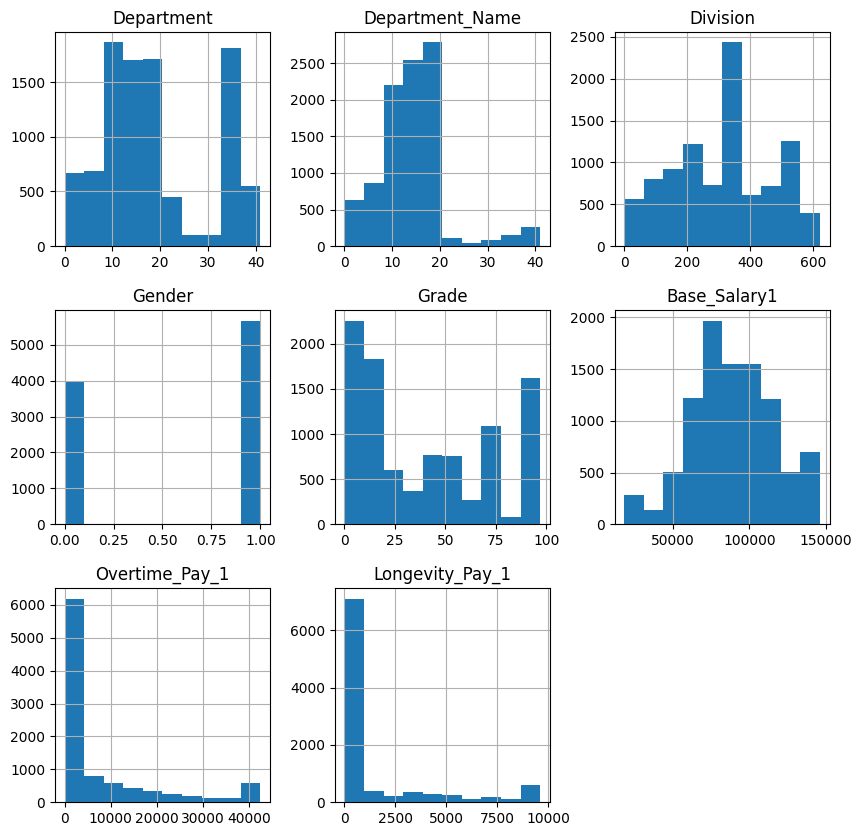

In [64]:
# univarient analysis
df.hist(figsize=(10,10))
plt.show()

In [ ]:
# Department:
# The distribution is bimodal, with two prominent peaks indicating that there are two departments with significantly higher frequencies than others.

# Department_Name:
# The distribution appears right-skewed, meaning that most of the data points are concentrated towards the left side of the histogram (lower values), with fewer occurrences as you move to the right. This indicates that a few department names are much more common than the rest.

# Division:
# The distribution shows multiple peaks, suggesting a multimodal distribution where several divisions have varying but significant counts. The spread of the data seems relatively even across some categories, but with noticeable peaks at specific divisions.

# Gender:
# This appears to be a categorical or binary distribution, likely representing two categories, such as Male (0) and Female (1), or vice versa. The two bars indicate the counts for each gender category. The distribution seems fairly balanced but not perfectly equal, as the bars are of different heights.

# Base_Salary:
# The Base_Salary histogram shows a right-skewed distribution. This means most individuals have a base salary concentrated on the lower end of the spectrum, with fewer individuals earning higher salaries. The skewness indicates that the mean salary is higher than the median salary.

# Overtime_Pay:
# Similar to Base_Salary, the Overtime_Pay histogram also shows a right-skewed distribution. The majority of individuals have little to no overtime pay, with a long tail extending to the right, indicating some individuals receive significantly higher overtime pay.

# Longevity_Pay:
# This histogram shows a highly right-skewed distribution, with most individuals receiving low or no longevity pay. There is a long tail on the right side, indicating that a small number of individuals receive much higher longevity pay.

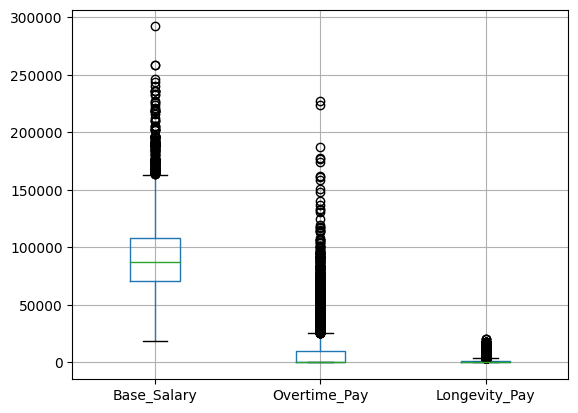

In [14]:
# visualizing outliers using a box plot (outliers are represented by dots)

numeric_columns = df[['Base_Salary','Overtime_Pay','Longevity_Pay']].boxplot()

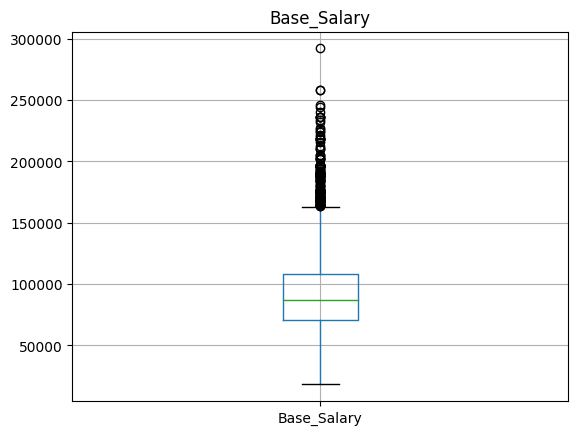

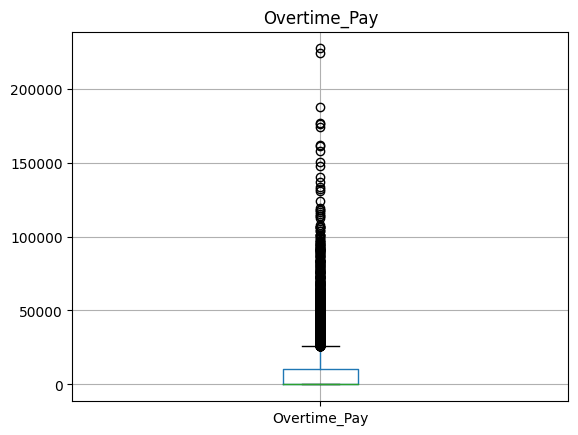

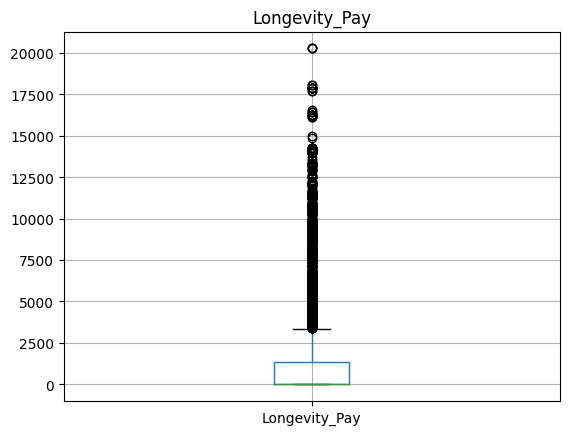

In [17]:
numeric_columns = df[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']]

for column in numeric_columns:
    df.boxplot(column=column)
    plt.title(column)
    plt.show()

In [20]:
# identifying outliers using z-score

z_scores = stats.zscore(df[[ 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay' ]])

# make them all into positive values
abs_z_scores = np.abs(z_scores)

# identify outliers as z-scores greater than 3 standard deviations from the mean
outliers = (abs_z_scores > 3).any(axis = 1)

df_outliers = df[outliers]
df_outliers

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
174,ABS,Alcohol Beverage Services,ABS 85 Director,F,236000.0,0.00,0.00,EX1
500,CAT,County Attorney's Office,CAT 30 Administration,M,193460.3,0.00,0.00,M1
502,CAT,County Attorney's Office,CAT 30 County Attorney,M,258000.0,0.00,0.00,EX1
590,CCL,County Council,CCL 01 Council Central Staff,M,196059.0,0.00,0.00,M1
757,CEC,Community Engagement Cluster,CEC 16 Regional Services Centers,M,197000.0,0.00,0.00,EX3
...,...,...,...,...,...,...,...,...
10122,SHF,Sheriff's Office,SHF 48 Court and Transport,M,101939.0,80162.41,5344.94,G4
10132,TBS,Department of Technology and Enterprise Busine...,TBS 34 CIO Chief Information Officer,F,227000.0,0.00,0.00,EX1
10151,TBS,Department of Technology and Enterprise Busine...,TBS 34 CIO Integrated Justice Information Systems,F,190823.0,0.00,3100.89,N40
10215,TBS,Department of Technology and Enterprise Busine...,TBS 34 OBP Fibernet Operations (GF),M,196059.0,0.00,0.00,M1


In [21]:
# These extreme values are significant for financial data analysis, so we will retain them

df_outliers.shape

(666, 8)

In [23]:
custom_colors = [
    '#e5c3c6',
    '#cad2a7',
    '#f96161',
    '#bcd2d0',
    '#d0b783',
    '#a3d2ca',
    '#f2b8ff',
    '#d5b1a2',
    '#9ca7d0',
    '#f4cb8a'
]

<ipython-input-24-1190a3f2f1d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_outliers, x='Department_Name', y='count', palette=custom_colors)
<ipython-input-24-1190a3f2f1d5>:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=top_5_outliers, x='Department_Name', y='count', palette=custom_colors)


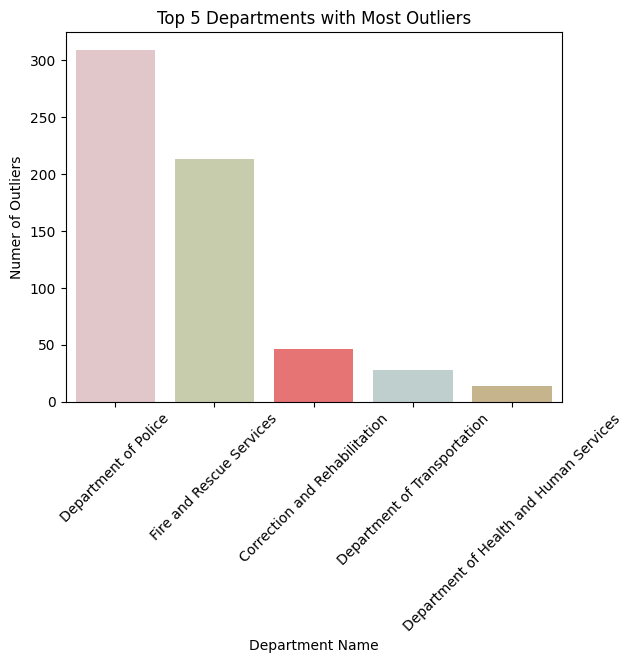

In [24]:
# top 5 departments with most outliers

top_5_outliers = df_outliers['Department_Name'].value_counts().head(5).reset_index()

sns.barplot(data=top_5_outliers, x='Department_Name', y='count', palette=custom_colors)
plt.title('Top 5 Departments with Most Outliers')
plt.xlabel('Department Name')
plt.ylabel('Numer of Outliers')
plt.xticks(rotation=45)
plt.show()

In [25]:
num_unique_departments = df['Department'].nunique()
print(f"The number of unique values in the Department column is: {num_unique_departments}")

The number of unique values in the Department column is: 42


<ipython-input-26-b47f11e858af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_departments, x='Department_Name', y='count', palette=custom_colors)


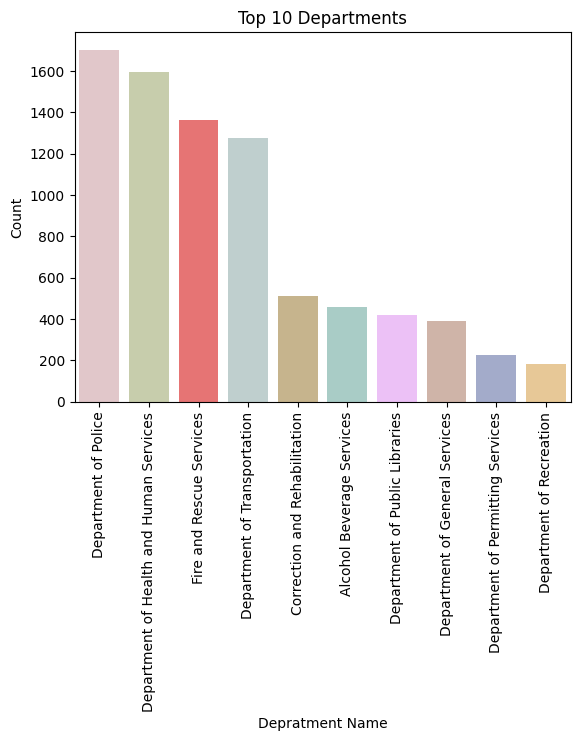

In [26]:
# Visualize count of occurrences for top 10 values in the 'Department_Name' column

top_10_departments = df['Department_Name'].value_counts().head(10).reset_index()

sns.barplot(data=top_10_departments, x='Department_Name', y='count', palette=custom_colors)
plt.title('Top 10 Departments')
plt.xlabel('Depratment Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
num_unique_divisions = df['Division'].nunique()
print(f"The number of unique values in the Division column is: {num_unique_divisions}")

The number of unique values in the Division column is: 624


<ipython-input-28-486e41a12374>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_divisions, x='Division', y='count', palette=custom_colors)


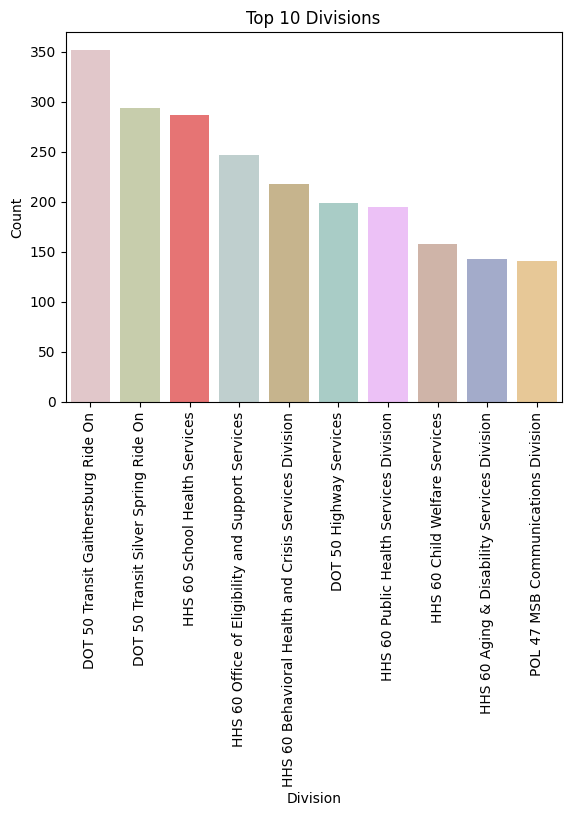

In [28]:
# Visualize the count of occurrences for the top 10 values in the 'Division' column
top_10_divisions = df['Division'].value_counts().head(10).reset_index()

sns.barplot(data=top_10_divisions, x='Division', y='count', palette=custom_colors)
plt.title('Top 10 Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-29-3bdcb74400a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='Gender', palette=[custom_colors[1], custom_colors[0]])


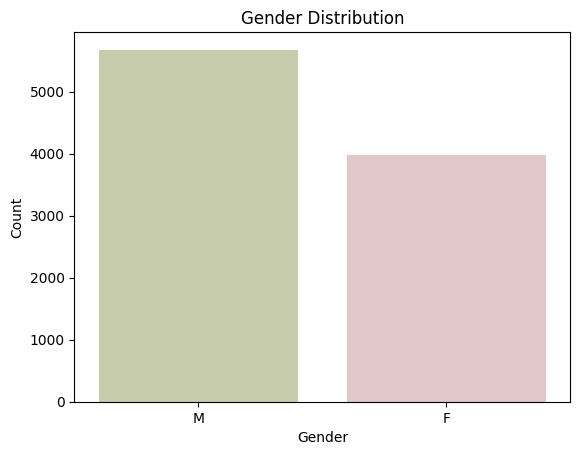

,Count,Percentage
Gender,,
M,5674,58.8
F,3975,41.2


In [29]:
# Visualizing Gender Distribution

gender_counts = df['Gender'].value_counts()
gender_percentages = (df['Gender'].value_counts(normalize=True) * 100).round(1)

sns.countplot(data = df, x='Gender', palette=[custom_colors[1], custom_colors[0]])
plt.ylabel("Count")
plt.title('Gender Distribution')
plt.show()

# combine counts and percentages into a DataFrame
res_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})
res_df


In [30]:
num_unique_grades = df['Grade'].nunique()
print(f"The number of unique values in the Grade column is: {num_unique_grades}")

The number of unique values in the Grade column is: 98


<ipython-input-31-f236dca2d367>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_grades, x='Grade', y='count', palette=custom_colors)


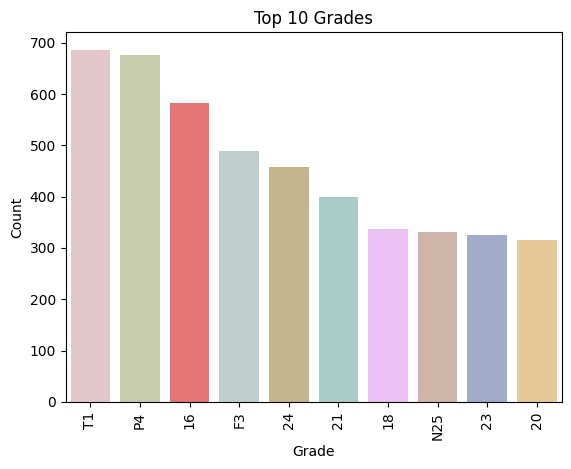

In [31]:
# Visualize the count of occurrences for the top 10 values in the 'Grade' column

top_10_grades = df['Grade'].value_counts().head(10).reset_index()

sns.barplot(data=top_10_grades, x='Grade', y='count', palette=custom_colors)
plt.title('Top 10 Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Histograms
df['Base_Salary'].describe().round()

,Base_Salary
count,9649.0
mean,90530.0
std,30464.0
min,18258.0
25%,71081.0
50%,87328.0
75%,107934.0
max,292000.0


In [33]:
def get_num_of_bins(category):
    Q1 = df[category].quantile(0.25)
    Q3 = df[category].quantile(0.75)

    IQR = Q3 - Q1
    n = len(df)

    # Calculate the bin width using Freedman-Diaconis rule
    bin_width = 2 * (IQR / np.cbrt(n))

    data_range = df[category].max() - df[category].min()

    # Determine the number of bins
    num_bins = int(np.ceil(data_range / bin_width))
    return num_bins

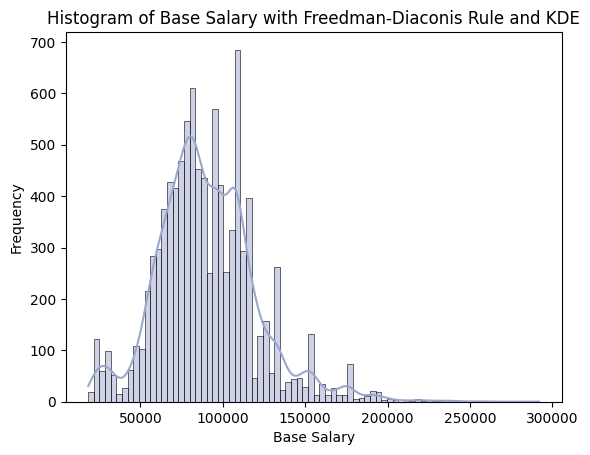

In [34]:
# plotting

sns.histplot(data=df, x='Base_Salary', bins=get_num_of_bins('Base_Salary'), kde=True, color='#9ca7d0')
plt.title('Histogram of Base Salary with Freedman-Diaconis Rule and KDE')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Gender Pay Gap Analysis
gender_gap = df.groupby('Gender')['Base_Salary'].mean()
gender_gap_df = gender_gap.reset_index()

<ipython-input-36-885404cef66f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_gap_df, x='Gender', y='Base_Salary', palette=custom_colors)
<ipython-input-36-885404cef66f>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=gender_gap_df, x='Gender', y='Base_Salary', palette=custom_colors)


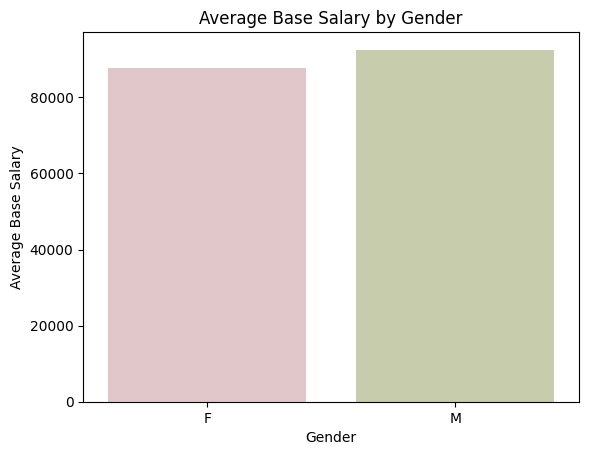

In [36]:
sns.barplot(data=gender_gap_df, x='Gender', y='Base_Salary', palette=custom_colors)
plt.title('Average Base Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Base Salary')
plt.show()

In [38]:
df.dtypes

,0
Department,object
Department_Name,object
Division,object
Gender,object
Base_Salary,float64
Overtime_Pay,float64
Longevity_Pay,float64
Grade,object


In [39]:
categorical_columns=df.select_dtypes(include=['object']) #categorical columns
categorical_columns

,Department,Department_Name,Division,Gender,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,16
...,...,...,...,...,...
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,N28
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,N32
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,N21


In [40]:
from sklearn.preprocessing import LabelEncoder      #encoding method for change categorical values to numerical values
le=LabelEncoder()
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])

In [41]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0,0,0,1,175873.000,0.00,0.0,55
1,0,0,0,1,145613.360,0.00,0.0,56
2,0,0,0,0,136970.000,0.00,0.0,56
3,0,0,1,0,89432.694,0.00,2490.0,11
4,0,0,1,0,78947.000,456.68,6257.7,6


In [42]:
df.describe() #descriptive statics

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
count,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000
mean,19.163437,14.490621,312.639030,0.588040,90530.121059,8616.459808,1577.012563,40.443466
std,11.206690,7.521841,156.369718,0.492213,30463.741275,16895.363879,3259.647168,32.789016
min,0.000000,0.000000,0.000000,0.000000,18257.500000,0.000000,0.000000,0.000000
25%,12.000000,11.000000,195.000000,0.000000,71080.560100,0.000000,0.000000,10.000000
50%,16.000000,14.000000,332.000000,1.000000,87328.000000,526.710000,0.000000,34.000000
75%,29.000000,18.000000,431.000000,1.000000,107934.000000,10275.500000,1352.530000,70.000000
max,41.000000,41.000000,623.000000,1.000000,292000.000000,227428.990000,20279.460000,97.000000


In [43]:
df.corr() #correlations

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
Department,1.000000,0.458752,0.958425,-0.073551,0.132903,-0.059940,0.183965,0.164422
Department_Name,0.458752,1.000000,0.470293,0.088303,0.146281,0.087110,0.048779,0.214782
Division,0.958425,0.470293,1.000000,-0.124506,0.131928,-0.069626,0.169404,0.108881
Gender,-0.073551,0.088303,-0.124506,1.000000,0.078004,0.267720,0.110666,0.179774
Base_Salary,0.132903,0.146281,0.131928,0.078004,1.000000,0.077989,0.301999,0.281458
Overtime_Pay,-0.059940,0.087110,-0.069626,0.267720,0.077989,1.000000,0.228363,0.157848
Longevity_Pay,0.183965,0.048779,0.169404,0.110666,0.301999,0.228363,1.000000,0.024586
Grade,0.164422,0.214782,0.108881,0.179774,0.281458,0.157848,0.024586,1.000000


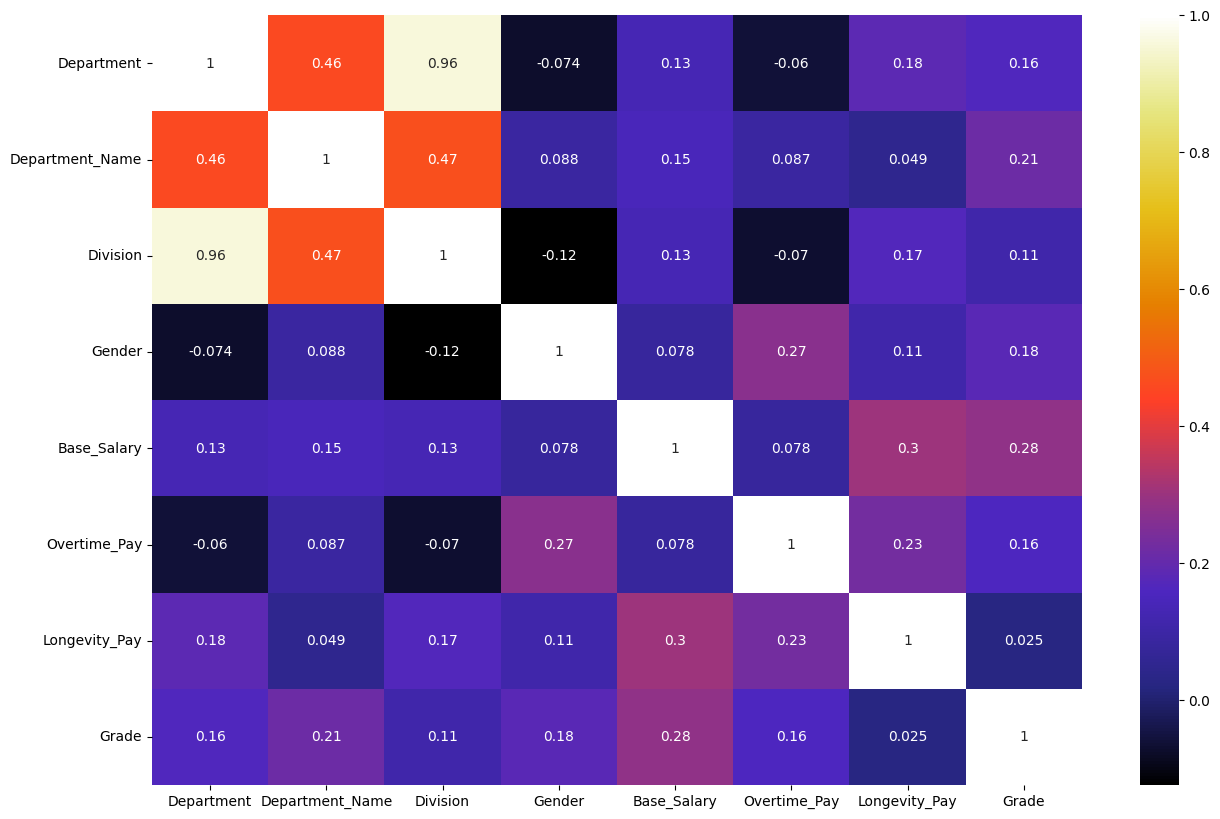

In [44]:
# headmap
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap)
plt.show()

In [ ]:
# observations:

# headmap will be used into how much strength have in data set
# division has been highly correlated to department.

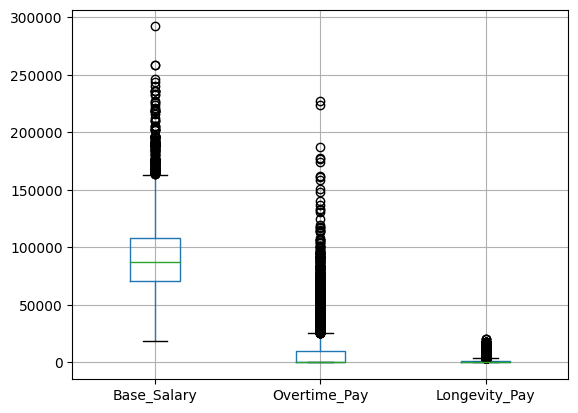

In [45]:
# visualizing outliers using a box plot (outliers are represented by dots)

numeric_columns = df[['Base_Salary','Overtime_Pay','Longevity_Pay']].boxplot()

In [46]:
# handling outliers
# Capping outliers
import numpy as np
cap_value = df['Base_Salary'].quantile(0.95)
df['Base_Salary1'] = np.where(df['Base_Salary'] > cap_value, cap_value, df['Base_Salary'])

In [47]:
# Capping outliers
import numpy as np
cap_value = df['Overtime_Pay'].quantile(0.95)
df['Overtime_Pay_1'] = np.where(df['Overtime_Pay'] > cap_value, cap_value, df['Overtime_Pay'])

In [48]:
# Capping outliers
import numpy as np
cap_value = df['Longevity_Pay'].quantile(0.95)
df['Longevity_Pay_1'] = np.where(df['Longevity_Pay'] > cap_value, cap_value, df['Longevity_Pay'])

In [49]:
df=df.drop(['Base_Salary'],axis=1)
df=df.drop(['Overtime_Pay'],axis=1)
df=df.drop(['Longevity_Pay'],axis=1)

In [50]:
df.head()

,Department,Department_Name,Division,Gender,Grade,Base_Salary1,Overtime_Pay_1,Longevity_Pay_1
0,0,0,0,1,55,146204.000,0.00,0.0
1,0,0,0,1,56,145613.360,0.00,0.0
2,0,0,0,0,56,136970.000,0.00,0.0
3,0,0,1,0,11,89432.694,0.00,2490.0
4,0,0,1,0,6,78947.000,456.68,6257.7


In [ ]:
# After handling outliers observations
# To handle outliers and change the column names like Base_Salary1	Overtime_Pay_1	Longevity_Pay_1
# outliers affect the model accuracy so, we are using capping method, its help to change into outlier values to corrected values

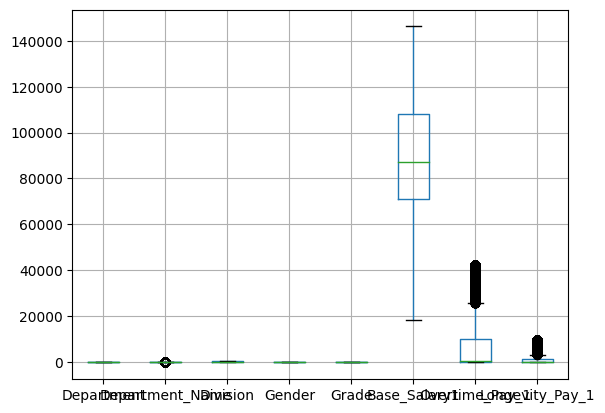

In [51]:
# boxplot
df.boxplot()
plt.show()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [55]:
# Features and target
X = df.drop(['Base_Salary1'],axis=1)
y=df['Base_Salary1']

In [56]:
# For the sake of example, let's create a synthetic dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [57]:
# Fit the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [58]:
# Predict and evaluate
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [59]:
# Calculate mean squared error for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Linear Regression MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree MSE: {mse_dt}, R²: {r2_dt}")
print(f"Random Forest MSE: {mse_rf}, R²: {r2_rf}")
print(f"Gradient Boosting MSE: {mse_gb}, R²: {r2_gb}")

Linear Regression MSE: 0.009511914910418967, R²: 0.9999994362016347
Decision Tree MSE: 6350.427786748267, R²: 0.6235920065402036
Random Forest MSE: 2621.793155098221, R²: 0.8445988311470158
Gradient Boosting MSE: 1234.752982660588, R²: 0.9268126639292507


In [ ]:
# Linear Regression MSE: 0.009511914910418967, R²: 0.9999994362016347
# Decision Tree MSE: 6350.427786748267, R²: 0.6235920065402036
# Random Forest MSE: 2621.793155098221, R²: 0.8445988311470158
# Gradient Boosting MSE: 1234.752982660588, R²: 0.9268126639292507

# linear regression will be more accuracy with compared to others.

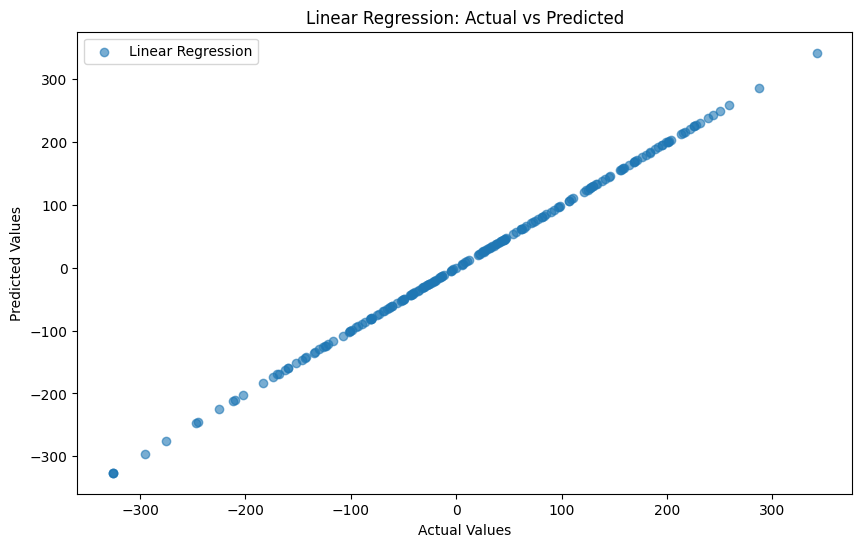

In [60]:
# Visualization of the Linear Regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

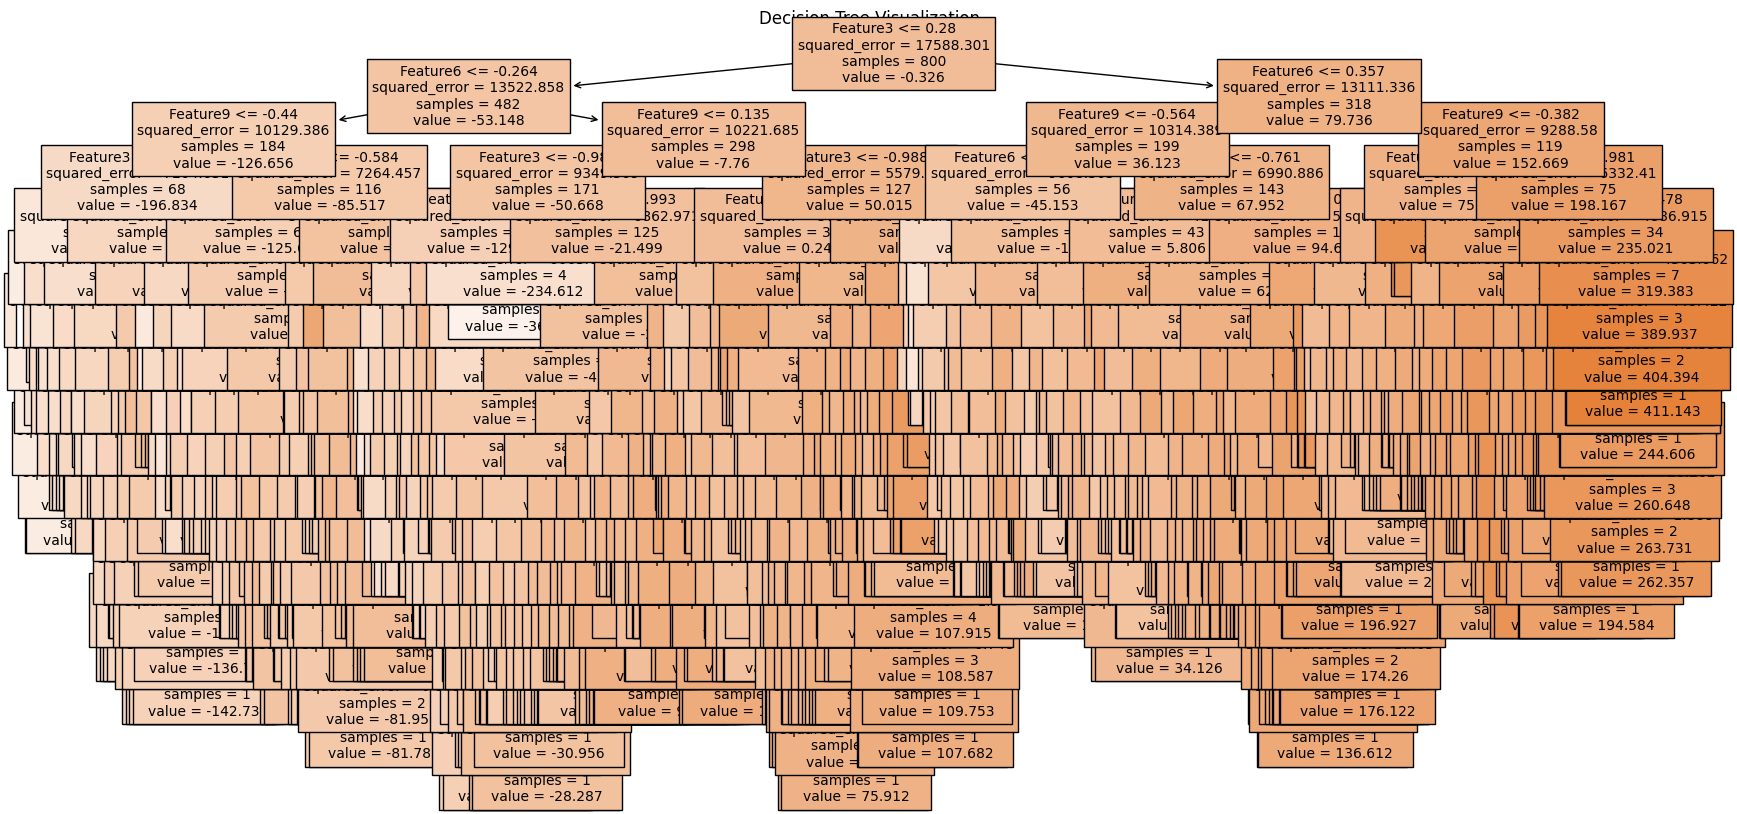

In [61]:
# Visualization of the Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=[f'Feature{i}' for i in range(X.shape[1])], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

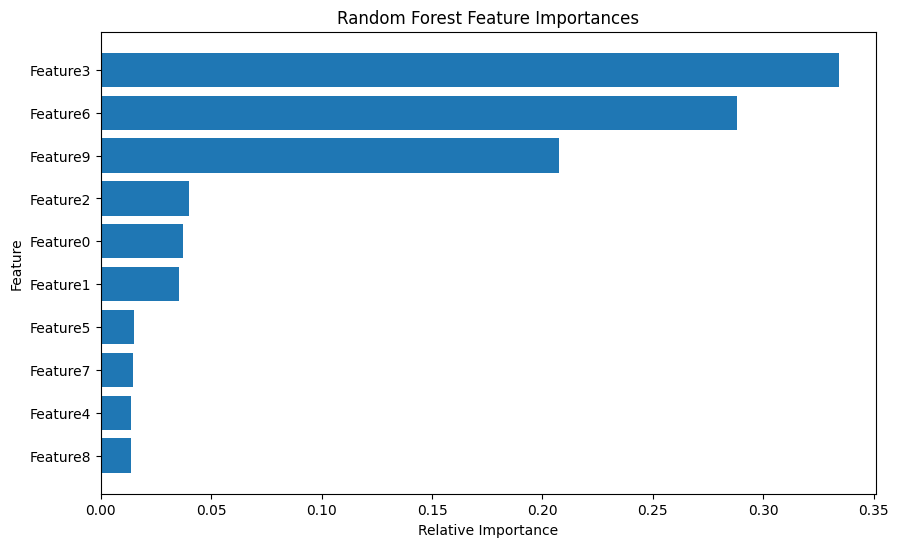

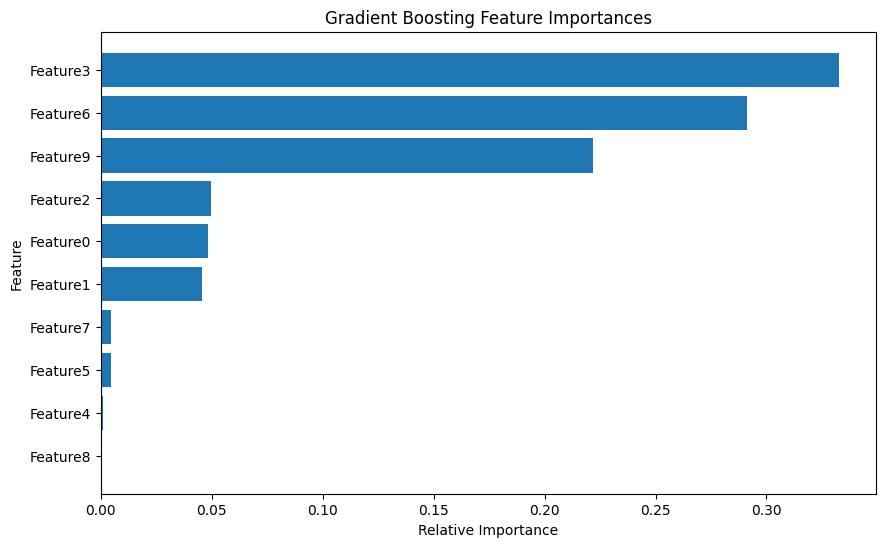

In [62]:
# Feature Importances for Random Forest and Gradient Boosting
features = [f'Feature{i}' for i in range(X.shape[1])]

def plot_feature_importances(model, model_name):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importances(rf, 'Random Forest')
plot_feature_importances(gb, 'Gradient Boosting')

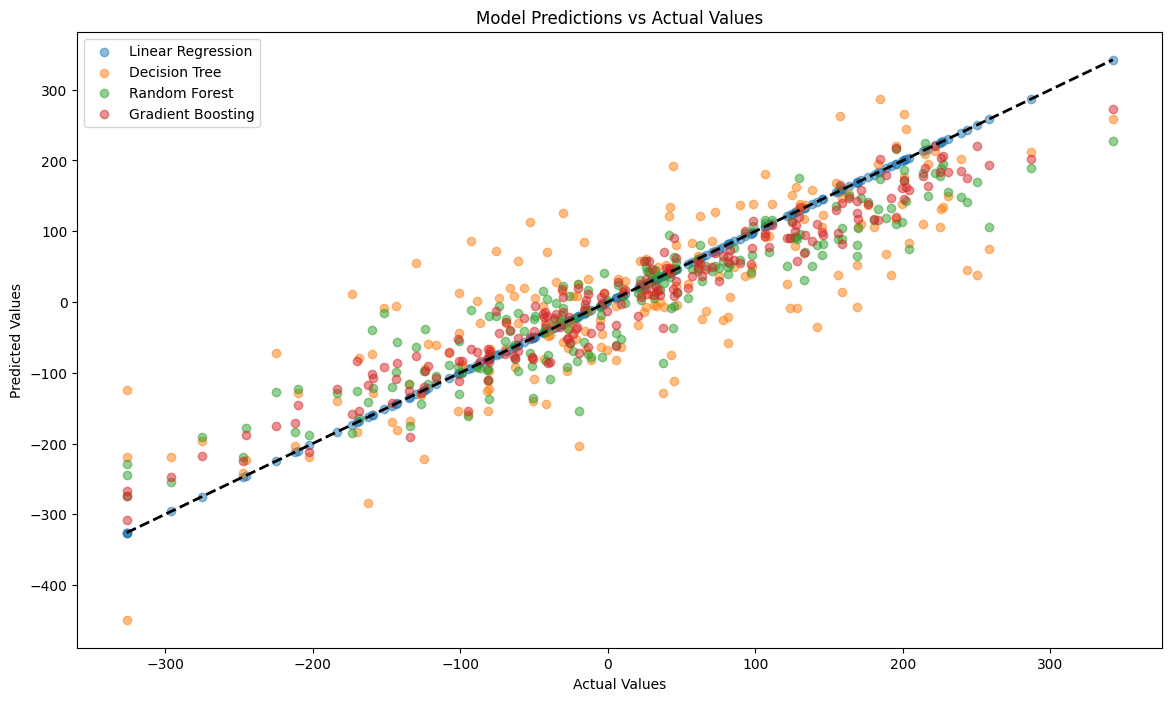

In [63]:
# Prediction vs Actual Values for all models
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()